In [11]:
import pandas as pd
import os
import numpy as np
import time
import tensorflow.keras.initializers
import statistics
import tensorflow.keras as keras
from sklearn import metrics
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Lambda, Flatten, Reshape, LeakyReLU, Dense, Activation, Dropout, InputLayer, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scipy.interpolate
import logging, os
from IPython import display
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.chdir("FRUIT")
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn')
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Lambda, Flatten, Reshape, LeakyReLU, Dense, Activation, Dropout, InputLayer, Input
from tensorflow.keras.layers import LeakyReLU
import tensorflow.keras.initializers
import statistics
import tensorflow.keras as keras

import constants
import data_generation

In [12]:
from fruit_spectra import randFission, randGauss, randHighEnergy, randEvap

In [13]:
def fission(N):
    y = []
    for i in range(N):
        y.append(randFission())
    y = np.array(y)
    x = np.matmul(y, cm.T)
    return x,y
    
def gauss(N):
    y = []
    for i in range(N):
        y.append(randGauss())
    y = np.array(y)
    x = np.matmul(y, cm.T)
    return x,y

def highenergy(N):
    y = []
    for i in range(N):
        y.append(randHighEnergy())
    y = np.array(y)
    x = np.matmul(y, cm.T)
    return x,y

def evap(N):
    y = []
    for i in range(N):
        y.append(randEvap())
    y = np.array(y)
    x = np.matmul(y, cm.T)
    return x,y

In [14]:
import data_generation

In [15]:
# ~~~ ADDED ~~ ##

# Data directly taken from PDF
Ebins = np.array([1.00E-03,2.15E-03,4.64E-03,1.00E-02,2.15E-02,4.64E-02,1.00E-01,2.15E-01,4.64E-01,1.00E+00,2.15E+00,4.64E+00,1.00E+01,2.15E+01,4.64E+01,1.00E+02,2.15E+02,4.64E+02,1.00E+03,2.15E+03,4.64E+03,1.00E+04,1.25E+04,1.58E+04,1.99E+04,2.51E+04,3.16E+04,3.98E+04,5.01E+04,6.30E+04,7.94E+04,1.00E+05,1.25E+05,1.58E+05,1.99E+05,2.51E+05,3.16E+05,3.98E+05,5.01E+05,6.30E+05,7.94E+05,1.00E+06,1.25E+06,1.58E+06,1.99E+06,2.51E+06,3.16E+06,3.98E+06,5.01E+06,6.30E+06,7.94E+06,1.00E+07,1.58E+07])

EbinsExtended = np.array([1.00E-03,2.15E-03,4.64E-03,1.00E-02,2.15E-02,4.64E-02,1.00E-01,2.15E-01,4.64E-01,1.00E+00,2.15E+00,4.64E+00,1.00E+01,2.15E+01,4.64E+01,1.00E+02,2.15E+02,4.64E+02,1.00E+03,2.15E+03,4.64E+03,1.00E+04,1.25E+04,1.58E+04,1.99E+04,2.51E+04,3.16E+04,3.98E+04,5.01E+04,6.30E+04,7.94E+04,1.00E+05,1.25E+05,1.58E+05,1.99E+05,2.51E+05,3.16E+05,3.98E+05,5.01E+05,6.30E+05,7.94E+05,1.00E+06,1.25E+06,1.58E+06,1.99E+06,2.51E+06,3.16E+06,3.98E+06,5.01E+06,6.30E+06,7.94E+06,1.00E+07,1.58E+07, 2.51E+07])
lethargies = []
for i in range(len(Ebins)):
    lethargies.append(np.log(EbinsExtended[i + 1]) - np.log(EbinsExtended[i]))
    
cm = np.array([
[6.11E+00,5.60E+00,4.80E+00,3.89E+00,3.03E+00,2.27E+00,1.64E+00,1.17E+00,8.20E-01,5.72E-01,3.94E-01,2.73E-01,1.90E-01,1.28E-01,8.88E-02,6.02E-02,4.05E-02,2.79E-02,1.91E-02,1.27E-02,9.01E-03,6.86E-03,6.24E-03,5.62E-03,4.99E-03,4.37E-03,3.83E-03,3.36E-03,2.90E-03,2.43E-03,1.97E-03,1.64E-03,1.47E-03,1.31E-03,1.15E-03,9.96E-04,8.95E-04,8.61E-04,8.28E-04,7.94E-04,7.60E-04,7.22E-04,6.79E-04,6.37E-04,5.94E-04,5.51E-04,4.94E-04,4.19E-04,3.44E-04,2.70E-04,1.97E-04,1.39E-04,1.00E-04],
[7.36E-01,8.08E-01,9.34E-01,1.12E+00,1.36E+00,1.72E+00,2.11E+00,2.38E+00,2.47E+00,2.46E+00,2.37E+00,2.24E+00,2.04E+00,1.85E+00,1.65E+00,1.47E+00,1.30E+00,1.14E+00,1.01E+00,8.83E-01,7.64E-01,6.98E-01,6.69E-01,6.39E-01,6.09E-01,5.81E-01,5.54E-01,5.26E-01,4.99E-01,4.71E-01,4.41E-01,4.09E-01,3.77E-01,3.45E-01,3.13E-01,2.81E-01,2.49E-01,2.17E-01,1.87E-01,1.59E-01,1.34E-01,1.11E-01,9.38E-02,7.58E-02,5.80E-02,4.42E-02,3.52E-02,2.63E-02,1.95E-02,1.52E-02,1.10E-02,7.43E-03,4.65E-03],
[5.98E-01,6.57E-01,7.58E-01,9.00E-01,1.08E+00,1.42E+00,1.89E+00,2.27E+00,2.51E+00,2.65E+00,2.69E+00,2.67E+00,2.58E+00,2.45E+00,2.29E+00,2.14E+00,1.98E+00,1.83E+00,1.67E+00,1.53E+00,1.39E+00,1.31E+00,1.27E+00,1.23E+00,1.20E+00,1.16E+00,1.13E+00,1.09E+00,1.05E+00,1.02E+00,9.77E-01,9.33E-01,8.87E-01,8.35E-01,7.78E-01,7.19E-01,6.57E-01,5.94E-01,5.27E-01,4.61E-01,3.96E-01,3.39E-01,2.90E-01,2.42E-01,1.94E-01,1.54E-01,1.24E-01,9.54E-02,7.21E-02,5.66E-02,4.15E-02,2.81E-02,1.77E-02],
[5.01E-01,5.50E-01,6.34E-01,7.50E-01,9.18E-01,1.22E+00,1.62E+00,2.00E+00,2.31E+00,2.52E+00,2.66E+00,2.75E+00,2.75E+00,2.71E+00,2.63E+00,2.53E+00,2.41E+00,2.30E+00,2.18E+00,2.04E+00,1.92E+00,1.84E+00,1.81E+00,1.78E+00,1.74E+00,1.71E+00,1.67E+00,1.64E+00,1.61E+00,1.57E+00,1.53E+00,1.49E+00,1.44E+00,1.38E+00,1.32E+00,1.25E+00,1.17E+00,1.09E+00,9.97E-01,8.96E-01,7.96E-01,6.97E-01,6.02E-01,5.13E-01,4.24E-01,3.47E-01,2.85E-01,2.24E-01,1.77E-01,1.49E-01,1.21E-01,7.95E-02,4.26E-02],
[4.15E-01,4.55E-01,5.24E-01,6.18E-01,7.61E-01,1.01E+00,1.36E+00,1.72E+00,2.04E+00,2.27E+00,2.45E+00,2.58E+00,2.64E+00,2.67E+00,2.66E+00,2.63E+00,2.58E+00,2.51E+00,2.43E+00,2.35E+00,2.26E+00,2.21E+00,2.18E+00,2.15E+00,2.13E+00,2.10E+00,2.08E+00,2.06E+00,2.04E+00,2.02E+00,1.99E+00,1.95E+00,1.92E+00,1.88E+00,1.83E+00,1.77E+00,1.70E+00,1.61E+00,1.51E+00,1.38E+00,1.26E+00,1.13E+00,1.00E+00,8.67E-01,7.33E-01,6.13E-01,5.10E-01,4.08E-01,3.30E-01,2.80E-01,2.30E-01,1.55E-01,8.39E-02],
[3.43E-01,3.75E-01,4.31E-01,5.11E-01,6.31E-01,8.34E-01,1.12E+00,1.43E+00,1.72E+00,1.95E+00,2.13E+00,2.29E+00,2.39E+00,2.46E+00,2.50E+00,2.51E+00,2.52E+00,2.52E+00,2.47E+00,2.44E+00,2.39E+00,2.36E+00,2.35E+00,2.34E+00,2.33E+00,2.32E+00,2.31E+00,2.31E+00,2.30E+00,2.29E+00,2.28E+00,2.27E+00,2.26E+00,2.24E+00,2.22E+00,2.19E+00,2.13E+00,2.07E+00,1.97E+00,1.86E+00,1.73E+00,1.59E+00,1.42E+00,1.25E+00,1.08E+00,9.20E-01,7.60E-01,6.27E-01,5.14E-01,4.09E-01,3.03E-01,2.25E-01,1.40E-01],
[2.80E-01,3.07E-01,3.53E-01,4.23E-01,5.13E-01,6.91E-01,9.32E-01,1.18E+00,1.41E+00,1.62E+00,1.81E+00,1.95E+00,2.07E+00,2.18E+00,2.24E+00,2.29E+00,2.32E+00,2.34E+00,2.36E+00,2.36E+00,2.33E+00,2.33E+00,2.33E+00,2.33E+00,2.34E+00,2.34E+00,2.35E+00,2.37E+00,2.38E+00,2.39E+00,2.41E+00,2.43E+00,2.44E+00,2.46E+00,2.47E+00,2.47E+00,2.44E+00,2.40E+00,2.33E+00,2.23E+00,2.10E+00,1.98E+00,1.82E+00,1.63E+00,1.45E+00,1.26E+00,1.07E+00,8.88E-01,7.36E-01,6.29E-01,5.22E-01,3.61E-01,2.04E-01],
[1.85E-01,2.05E-01,2.34E-01,2.79E-01,3.42E-01,4.57E-01,6.16E-01,7.74E-01,9.38E-01,1.08E+00,1.22E+00,1.34E+00,1.44E+00,1.52E+00,1.61E+00,1.69E+00,1.74E+00,1.80E+00,1.87E+00,1.90E+00,1.92E+00,1.96E+00,1.98E+00,2.00E+00,2.02E+00,2.05E+00,2.08E+00,2.12E+00,2.16E+00,2.20E+00,2.25E+00,2.31E+00,2.37E+00,2.43E+00,2.50E+00,2.57E+00,2.62E+00,2.66E+00,2.68E+00,2.67E+00,2.61E+00,2.53E+00,2.42E+00,2.25E+00,2.06E+00,1.82E+00,1.57E+00,1.36E+00,1.16E+00,9.63E-01,7.98E-01,5.95E-01,3.53E-01],
[1.18E-01,1.30E-01,1.52E-01,1.79E-01,2.13E-01,2.91E-01,3.95E-01,5.07E-01,6.09E-01,7.04E-01,7.92E-01,8.66E-01,9.43E-01,1.02E+00,1.08E+00,1.14E+00,1.20E+00,1.25E+00,1.31E+00,1.37E+00,1.42E+00,1.46E+00,1.48E+00,1.50E+00,1.53E+00,1.55E+00,1.58E+00,1.62E+00,1.67E+00,1.73E+00,1.80E+00,1.87E+00,1.95E+00,2.05E+00,2.15E+00,2.27E+00,2.41E+00,2.52E+00,2.59E+00,2.65E+00,2.70E+00,2.71E+00,2.67E+00,2.58E+00,2.44E+00,2.25E+00,2.02E+00,1.78E+00,1.55E+00,1.31E+00,1.07E+00,8.07E-01,5.25E-01],
[7.19E-02,8.04E-02,9.38E-02,1.13E-01,1.40E-01,1.84E-01,2.52E-01,3.21E-01,3.84E-01,4.42E-01,5.04E-01,5.58E-01,6.06E-01,6.49E-01,6.77E-01,7.23E-01,7.85E-01,8.28E-01,8.73E-01,9.13E-01,9.47E-01,9.90E-01,1.01E+00,1.04E+00,1.06E+00,1.08E+00,1.12E+00,1.16E+00,1.21E+00,1.25E+00,1.32E+00,1.38E+00,1.46E+00,1.56E+00,1.68E+00,1.80E+00,1.95E+00,2.08E+00,2.22E+00,2.35E+00,2.47E+00,2.57E+00,2.65E+00,2.64E+00,2.54E+00,2.38E+00,2.16E+00,2.01E+00,1.87E+00,1.62E+00,1.31E+00,1.02E+00,6.80E-01],
[3.63E-02,4.04E-02,4.84E-02,5.66E-02,6.52E-02,8.84E-02,1.21E-01,1.55E-01,1.90E-01,2.19E-01,2.43E-01,2.75E-01,2.99E-01,3.16E-01,3.39E-01,3.64E-01,3.90E-01,4.13E-01,4.36E-01,4.68E-01,5.00E-01,5.23E-01,5.34E-01,5.45E-01,5.56E-01,5.70E-01,5.91E-01,6.15E-01,6.37E-01,6.64E-01,7.03E-01,7.52E-01,8.14E-01,8.93E-01,9.84E-01,1.08E+00,1.21E+00,1.35E+00,1.52E+00,1.69E+00,1.88E+00,2.06E+00,2.22E+00,2.35E+00,2.41E+00,2.36E+00,2.22E+00,2.13E+00,2.03E+00,1.80E+00,1.56E+00,1.24E+00,8.69E-01],
[2.72E-02,3.05E-02,3.71E-02,4.49E-02,5.41E-02,6.96E-02,9.36E-02,1.26E-01,1.48E-01,1.70E-01,1.92E-01,2.18E-01,2.33E-01,2.37E-01,2.65E-01,2.89E-01,3.08E-01,3.26E-01,3.46E-01,3.70E-01,3.83E-01,4.06E-01,4.22E-01,4.38E-01,4.53E-01,4.69E-01,4.83E-01,4.97E-01,5.10E-01,5.29E-01,5.61E-01,6.09E-01,6.70E-01,7.43E-01,8.24E-01,9.19E-01,1.03E+00,1.14E+00,1.29E+00,1.46E+00,1.66E+00,1.85E+00,2.02E+00,2.19E+00,2.30E+00,2.29E+00,2.18E+00,2.10E+00,2.03E+00,1.82E+00,1.60E+00,1.31E+00,9.15E-01],
[1.05E-02,1.11E-02,1.29E-02,1.55E-02,1.94E-02,2.79E-02,3.72E-02,4.61E-02,5.23E-02,5.95E-02,7.00E-02,7.80E-02,8.42E-02,8.85E-02,9.14E-02,1.01E-01,1.17E-01,1.20E-01,1.28E-01,1.34E-01,1.43E-01,1.46E-01,1.54E-01,1.62E-01,1.66E-01,1.65E-01,1.67E-01,1.73E-01,1.87E-01,2.06E-01,2.26E-01,2.40E-01,2.54E-01,2.84E-01,3.25E-01,3.79E-01,4.50E-01,5.37E-01,6.52E-01,7.77E-01,9.34E-01,1.12E+00,1.32E+00,1.51E+00,1.68E+00,1.77E+00,1.77E+00,1.88E+00,1.98E+00,1.89E+00,1.68E+00,1.43E+00,1.05E+00],
[1.65E-03,2.14E-03,2.62E-03,3.40E-03,4.49E-03,5.06E-03,6.08E-03,8.28E-03,1.04E-02,1.26E-02,1.46E-02,1.60E-02,1.70E-02,1.80E-02,2.01E-02,2.21E-02,2.39E-02,2.40E-02,2.27E-02,2.46E-02,2.65E-02,2.94E-02,3.12E-02,3.30E-02,3.48E-02,3.63E-02,3.72E-02,3.78E-02,3.84E-02,4.01E-02,4.48E-02,5.09E-02,5.71E-02,6.37E-02,7.14E-02,8.52E-02,1.06E-01,1.32E-01,1.73E-01,2.28E-01,3.12E-01,4.31E-01,5.70E-01,7.23E-01,8.93E-01,1.03E+00,1.11E+00,1.31E+00,1.55E+00,1.59E+00,1.52E+00,1.40E+00,1.09E+00],
[4.83E-04,4.94E-04,5.05E-04,6.48E-04,9.25E-04,1.11E-03,1.21E-03,1.33E-03,1.45E-03,1.63E-03,1.87E-03,2.12E-03,3.00E-03,4.46E-03,4.11E-03,3.78E-03,3.54E-03,3.66E-03,4.27E-03,4.84E-03,5.42E-03,6.01E-03,6.35E-03,6.69E-03,7.03E-03,7.31E-03,7.49E-03,7.62E-03,7.76E-03,7.97E-03,8.39E-03,9.16E-03,1.03E-02,1.20E-02,1.42E-02,1.83E-02,2.47E-02,3.10E-02,4.07E-02,5.80E-02,8.93E-02,1.39E-01,2.08E-01,3.07E-01,4.30E-01,5.79E-01,7.51E-01,9.22E-01,1.10E+00,1.22E+00,1.25E+00,1.22E+00,1.08E+00]])

# Showing that CM has linearly independent rows

In [16]:
u, s, v = np.linalg.svd(cm)
s

array([3.43699227e+01, 1.50746339e+01, 1.08827539e+01, 6.08839211e+00,
       2.58942671e+00, 9.15283523e-01, 2.80455870e-01, 1.43515861e-01,
       8.99342843e-02, 7.44468059e-02, 5.54268989e-02, 4.06233120e-02,
       3.74714753e-02, 3.72760207e-02, 2.34541185e-02])

In [17]:
len(s)

15

In [18]:
# Loads the real-world data from IAEA tecdoc
def loadXY():

    '''
    Can't figure out how to pass non-optimiziable variable to the bayes opt
    module. Just load them from pickle everytime in evaluate_network()
    '''
    unfolding_data = pd.read_pickle("../IAEA_data/unfolding_data.pkl")

    X = np.zeros((251,15))
    Y = np.zeros((251,53))
    for row in range(251):
        #X[row,:] = unfolding_data['Detector Response'][row]
        Y[row,:] = unfolding_data['Spectrum'][row][0:53]
    
    # Divides out the lethargy interval
    for y in Y:
        for i in range(len(Ebins)):
            y[i] = y[i] * lethargies[i]
    
    # Fixes normalization back to 1 because of precision errors
    for i in range(len(Y)):
        Y[i] = Y[i] / np.sum(Y[i])
    
    # Multiplies by the conversion matrix to determine the detector response
    X = []
    for y in Y:
        X.append(np.matmul(cm, y))
    X = np.array(X)
    
    return X,Y

x,y = loadXY()

# Residual Computation

In [19]:
IAEA = lambda _0, _1 : loadXY()
PSA = data_generation.PSA
FRUIT = data_generation.FRUIT
GAUSS = data_generation.GAUSS
GAN = data_generation.GAN
RAND = data_generation.RAND

DATA_GENS = [IAEA, PSA, FRUIT, RAND]
labels = ["IAEA", "PSA", "FRUIT", "RAND"]

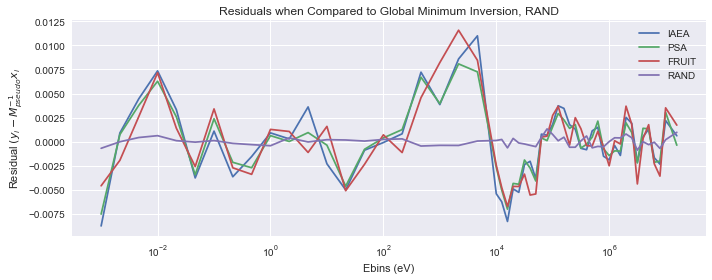

In [20]:
fig, axs = plt.subplots(1, 1, figsize = (10,4))

for i in range(len(DATA_GENS)):
    
    x,y = DATA_GENS[i](2000, loadXY()[1])
    
    resid = np.zeros(len(Ebins))
    for j in range(len(x)):
        resid += (y[j] - np.matmul(np.linalg.pinv(cm), x[j]))

    resid = resid / (j + 1)

    axs.plot(Ebins, resid, label = labels[i])
    axs.set_xscale("log")
    
    axs.set_xlabel("Ebins (eV)")
    axs.set_ylabel("Residual $(y_i - M_{pseudo}^{-1} x_i$")
    axs.set_title("Residuals when Compared to Global Minimum Inversion, " + labels[i])
    
plt.tight_layout()
plt.savefig("residuals_actual.png", dpi = 500)
plt.legend()

In [21]:
x,y = loadXY()

x,y = data_generation.PSA(5000, y)
wPSA = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = data_generation.FRUIT(5000, [])
wFRUIT = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = data_generation.RAND(5000, [])
wRAND = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

In [22]:
x,y = loadXY()

mseMPinv = 0
msePSA = 0
mseFRUIT = 0
mseRAND = 0

MPinv = np.linalg.pinv(cm)

for i in range(x.shape[0]):
    mseMPinv += np.mean((y[i] - np.matmul(MPinv, x[i]))**2)
    msePSA += np.mean((y[i] - np.matmul(x[i], wPSA))**2)
    mseFRUIT += np.mean((y[i] - np.matmul(x[i], wFRUIT))**2)
    mseRAND += np.mean((y[i] - np.matmul(x[i], wRAND))**2)

mseMPinv /= i + 1
msePSA /= i + 1
mseFRUIT /= i + 1
mseRAND /= i + 1

print("PSA : {:e}".format(msePSA))
print("FRUIT : {:e}".format(mseFRUIT))
print("RAND : {:e}".format(mseRAND))
print("Moore Penrose : {:e}".format(mseMPinv))

PSA : 8.474468e-05
FRUIT : 1.578960e-04
RAND : 2.233691e-04
Moore Penrose : 2.194649e-04


# Some Important Point on How The Training Data Affects Inversion

In [23]:
N = 5000

In [24]:

x,y = fission(N)
wFission = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = gauss(N)
wGauss = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = highenergy(N)
wHighEnergy = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = evap(N)
wEvap = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)


In [25]:
def plot_resids(x,y):

    mseFission = 0
    mseGauss = 0
    mseHighEnergy = 0
    mseEvap = 0

    for i in range(x.shape[0]):
        mseFission += np.mean((y[i] - np.matmul(x[i], wFission))**2)
        mseGauss += np.mean((y[i] - np.matmul(x[i], wGauss))**2)
        mseHighEnergy += np.mean((y[i] - np.matmul(x[i], wHighEnergy))**2)
        mseEvap += np.mean((y[i] - np.matmul(x[i], wEvap))**2)

    mseFission /= i + 1
    mseGauss /= i + 1
    mseHighEnergy /= i + 1
    mseEvap /= i + 1

    print("Fission : {:e}".format(mseFission))
    print("Gauss : {:e}".format(mseGauss))
    print("High Energy : {:e}".format(mseHighEnergy))
    print("Evap : {:e}".format(mseEvap))

    
    residFission = np.zeros(len(Ebins))
    residGauss = np.zeros(len(Ebins))
    residHighEnergy = np.zeros(len(Ebins))
    residEvap = np.zeros(len(Ebins))
    
    for i in range(x.shape[0]):
        residFission += (y[i] - np.matmul(x[i], wFission))
        residGauss += (y[i] - np.matmul(x[i], wGauss))
        residHighEnergy += (y[i] - np.matmul(x[i], wHighEnergy))
        residEvap += (y[i] - np.matmul(x[i], wEvap))
        
    residFission /= i
    residGauss /= i
    residHighEnergy /= i
    residEvap /= i
    
    plt.plot(Ebins, residFission, label = "Fission")
    plt.plot(Ebins, residGauss, label = "Gauss")
    plt.plot(Ebins, residHighEnergy, label = "High Energy")
    plt.plot(Ebins, residEvap, label = "Evap")
    
    plt.xscale("log")
    plt.legend()

Fission : 1.004482e-04
Gauss : 1.916569e-04
High Energy : 3.615494e-04
Evap : 4.155935e-04


Text(0.5, 1.0, 'Trained on Fission')

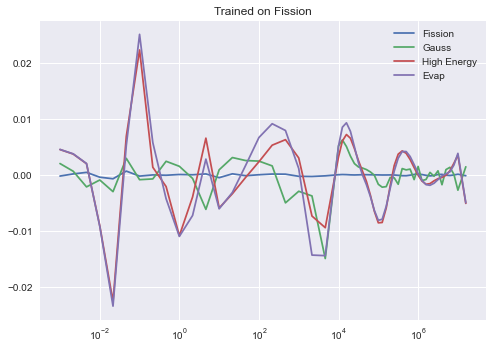

In [26]:
x,y = fission(N)
plot_resids(x,y)
plt.title("Trained on Fission")

Fission : 7.043004e-04
Gauss : 4.753679e-04
High Energy : 9.459552e-04
Evap : 1.043762e-03


Text(0.5, 1.0, 'Trained on Gaussian')

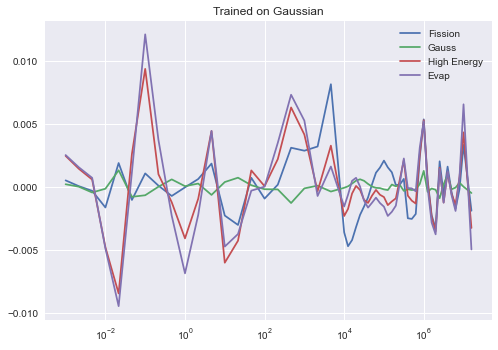

In [19]:
x,y = gauss(N)
plot_resids(x,y)
plt.title("Trained on Gaussian")

Fission : 4.771933e-05
Gauss : 8.359149e-05
High Energy : 2.700689e-05
Evap : 3.129217e-05


Text(0.5, 1.0, 'Trained on High Energy')

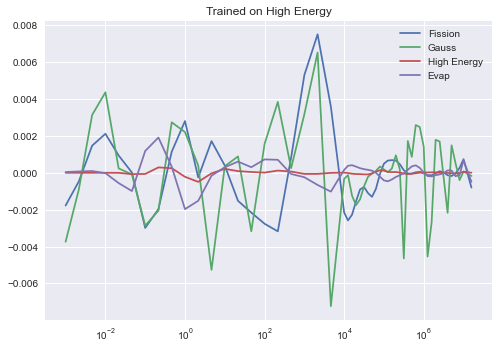

In [20]:
x,y = highenergy(N)
plot_resids(x,y)
plt.title("Trained on High Energy")

Fission : 9.759857e-05
Gauss : 1.642187e-04
High Energy : 3.899995e-05
Evap : 3.590377e-05


Text(0.5, 1.0, 'Trained on Evaporation')

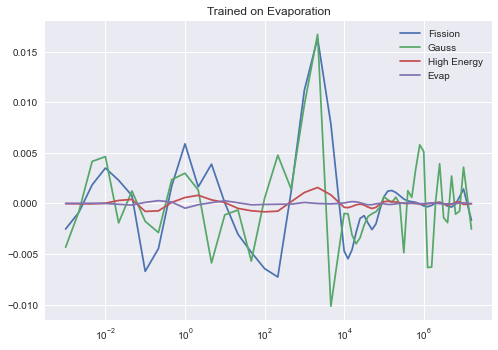

In [21]:
x,y = evap(N)
plot_resids(x,y)
plt.title("Trained on Evaporation")

# ML for Residual Guessing

In [22]:
def generate_model(layer1, layer2, layer3, drop):
    
    model = Sequential()
    
    model.add(Dense(int(layer1), activation = "sigmoid"))
    model.add(Dropout(drop))
    model.add(Dense(int(layer2), activation = "sigmoid"))
    model.add(Dropout(drop))
    model.add(Dense(int(layer3), activation = "sigmoid"))
    model.add(Dropout(drop))
    model.add(Dense(int(data_generation.yDim), activation = "relu"))
    
    return model

In [23]:
model = generate_model(300, 300, 300, 0.1)
model.compile(loss = "mse", optimizer = Adam(learning_rate=0.001))

x,y = fission(1000)
resid = (y - np.matmul(x, wFission))**2

SPLITS = 1
boot = ShuffleSplit(n_splits = SPLITS, test_size = 0.2)

Metal device set to: Apple M1


In [24]:
for train, test in boot.split(resid):
    xtrain, ytrain = x[train], y[train]
    xtest, ytest = x[test], y[test]
    
    model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs=10, batch_size = 64, verbose = 0)

In [25]:
x,y = fission(100)
resid = (y - np.matmul(x, wFission))**2

yGuess = model(x)

Text(0.5, 1.0, 'Showing that Neural Network determines the best Residual-Guessing Strategy is to not guess at all')

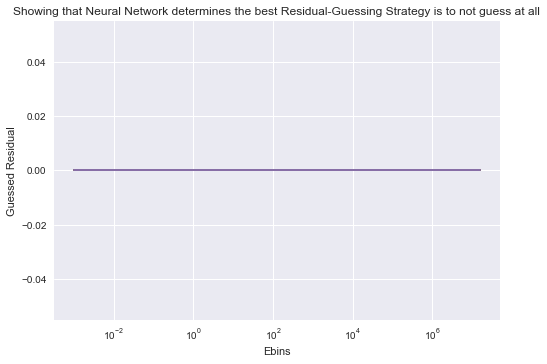

In [26]:
for guess in yGuess:
    plt.plot(Ebins, guess)

plt.xscale("log")
plt.xlabel("Ebins")
plt.ylabel("Guessed Residual")
plt.title("Showing that Neural Network determines the best Residual-Guessing Strategy is to not guess at all")

# Showing that Well-Engineered Training Data Returns the Correct Pseudo-Inverse

In [27]:
def eval_w(w):
    x,y = loadXY()
    return np.mean((y - np.matmul(x, w))**2)

def is_w_pseudoinv(w):
    return np.mean( ( np.matmul(cm, w.T) - np.identity(15) )**2 )

In [1342]:
x,y = fission(N)

w0 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

w1 = np.linalg.pinv(cm.T)

print("Unfolding ? :", eval_w(w0))
print("Identity ? :", is_w_pseudoinv(w0))

Unfolding ? : 0.00016539950856208263
Identity ? : 5.864010731904582e-15


In [1352]:
is_w_pseudoinv(w1)

2.6909608067434776e-29

In [1353]:
is_w_pseudoinv(w0)

5.864010731904582e-15

In [1351]:
np.mean( (w1 - w0)**2 )

10.962668874581635

# Point on Training Related to the Specificity of the Training Set

In [28]:
N = 5000

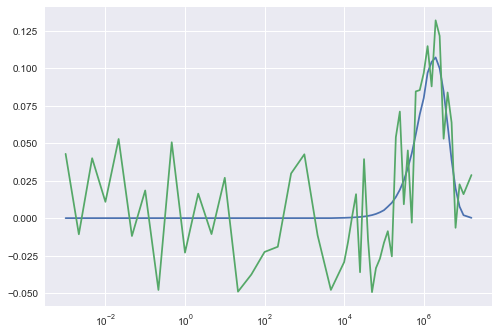

In [36]:
x,y = loadXY()
perturb0 = 0
y_perturb = y[perturb0]
x_perturb = x[perturb0]

plt.plot(Ebins, y_perturb)
plt.xscale("log")

x,y = [],[]

for _ in range(N):
    
    ynew = y_perturb + 0.1 * ( 0.5 - np.random.random(len(y_perturb)) )
    ynew = ynew / np.sum(ynew)
    y.append(ynew)
    
    xnew = np.matmul( cm, ynew )
    x.append(xnew)

x,y = np.array(x),np.array(y)
    
w0 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

plt.plot(Ebins, y[10])

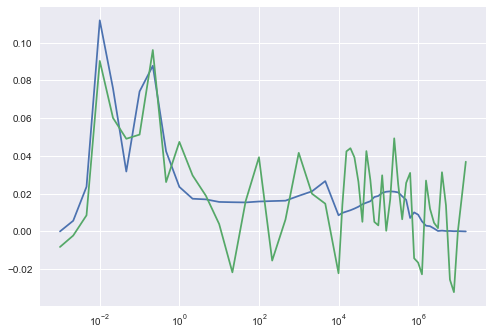

In [37]:
x,y = loadXY()
perturb1 = 50
y_perturb = y[perturb1]
x_perturb = x[perturb1]

plt.plot(Ebins, y_perturb)
plt.xscale("log")

x,y = [],[]

for _ in range(N):
    
    ynew = y_perturb + 0.1 * ( 0.5 - np.random.random(len(y_perturb)) )
    ynew = ynew / np.sum(ynew)
    y.append(ynew)
    
    xnew = np.matmul( cm, ynew )
    x.append(xnew)

x,y = np.array(x),np.array(y)
    
w1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

plt.plot(Ebins, y[10])

In [38]:
print(is_w_pseudoinv(w0))
print(is_w_pseudoinv(w1))

2.3626158178595704e-15
7.49215769917415e-18


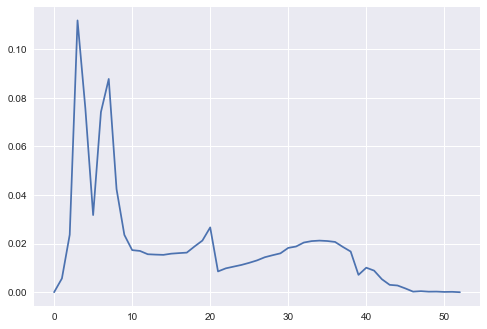

In [34]:
plt.plot(y_perturb)

Text(0.5, 1.0, 'Linear Regression,\nFor an Evaporation Spectra')

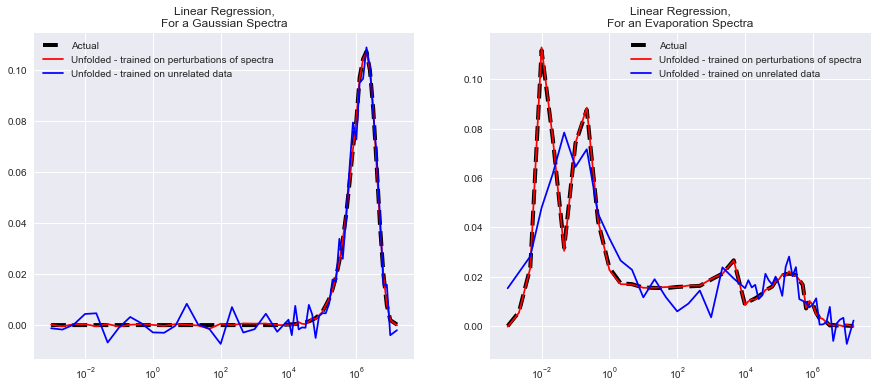

In [39]:
x,y = loadXY()

fig, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].plot(Ebins, y[perturb0], label = "Actual", color = "black", linestyle = "dashed", linewidth = 4)
axs[0].plot(Ebins, np.matmul(x[perturb0], w0), label = "Unfolded - trained on perturbations of spectra", color = "red")
axs[0].plot(Ebins, np.matmul(x[perturb0], w1), label = "Unfolded - trained on unrelated data", color = "blue")

axs[1].plot(Ebins, y[perturb1], label = "Actual", color = "black", linestyle = "dashed", linewidth = 4)
axs[1].plot(Ebins, np.matmul(x[perturb1], w1), label = "Unfolded - trained on perturbations of spectra", color = "red")
axs[1].plot(Ebins, np.matmul(x[perturb1], w0), label = "Unfolded - trained on unrelated data", color = "blue")

axs[0].set_xscale("log")
axs[1].set_xscale("log")
axs[0].legend()
axs[1].legend()
axs[0].set_title("Linear Regression,\nFor a Gaussian Spectra")
axs[1].set_title("Linear Regression,\nFor an Evaporation Spectra")

Takeaways:

- If the training data is close in domain to the data being unfolded, the pseudoinverse found will be very close to being correct. This is unsurprising

- Both of these matrices are pseudoinverses, however only one of them does a good job of the unfolding.

- Noisy relevant data better than clean irrelevant data

# Shuffle data, determine if the average of multiple distinct inversion matrices gives better performance:

### ( Mean vs Bias Tradeoff )

In [290]:

def evaluate_mean_bias():
    x,y = loadXY()

    use, reserve = next(ShuffleSplit(n_splits = 1, test_size = 0.1).split(x))

    xdata, ydata = x[use], y[use]
    xreserve, yreserve = x[reserve], y[reserve]

    models = []

    splits = 500
    boot = ShuffleSplit(n_splits = splits, test_size = 0.4)
    for train, ignore in boot.split(xdata):
        xtrain, ytrain = xdata[train], ydata[train]

        models.append(np.matmul(np.matmul(np.linalg.inv(np.matmul(xtrain.T, xtrain)), xtrain.T), ytrain))

    models = np.array(models)

    ypred = np.zeros(yreserve.shape)
    modelMSEs = []
    for model in models:
        ypred += np.matmul(xreserve, model)
        modelMSEs.append( np.mean( ( yreserve - np.matmul(xreserve, model) )**2 ) ) 
    ypred = ypred / len(models)
    totalMSE = np.mean( ( ypred - yreserve )**2 )
    
    return modelMSEs, totalMSE


In [291]:
min_MSE_subset = []
std_MSE_subset = []
avg_MSE_subset = []

avg_MSE_all_subsets = []

for _ in range(1000):
    modelMSEs, totalMSE = evaluate_mean_bias()
    min_MSE_subset.append(np.min(modelMSEs))
    std_MSE_subset.append(np.std(modelMSEs))
    avg_MSE_subset.append(np.mean(modelMSEs))
    avg_MSE_all_subsets.append(totalMSE)

NameError: name 'loadXY' is not defined

In [ ]:

x,y = loadXY()
pseudoinv = np.linalg.pinv(cm.T)
baseline = np.mean( ( y - np.matmul(x, pseudoinv) )**2 )


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0][0].hist(min_MSE_subset, bins=50, color = "blue", label = "Minimum Unfolding MSE across all Data Folds")
axs[0][0].set_xlim(0, 0.0003)
axs[0][0].vlines(baseline, 0, 50, color = "black", label = "Moore-Penrose Pseudo-Inverse Unfolding MSE")
axs[0][0].legend()

axs[0][1].hist(std_MSE_subset, bins=50, color = "blue", label = "Deviation in MSE across all Data Folds")
axs[0][1].set_xlim(0, 0.00015)
axs[0][1].legend()

axs[1][0].hist(avg_MSE_subset, bins=50, color = "blue", label = "Average MSE across all Data Folds")
axs[1][0].set_xlim(0, 0.0003)
axs[1][0].vlines(baseline, 0, 50, color = "black", label = "Moore-Penrose Pseudo-Inverse Unfolding MSE")
axs[1][0].legend()

axs[1][1].hist(avg_MSE_all_subsets, bins=50, color = "blue", label = "MSE of Averaged Unfolding across all Data Folds")
axs[1][1].set_xlim(0, 0.0003)
axs[1][1].vlines(baseline, 0, 50, color = "black", label = "Moore-Penrose Pseudo-Inverse Unfolding MSE")
axs[1][1].legend()

None

In [342]:
help(scipy.optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

# Test Classification Neural Network

In [738]:
# This is probably a hyperparamter ??
N = 100000

In [739]:
x,y = fission(N)
wFission = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = gauss(N)
wGauss = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = highenergy(N)
wHighEnergy = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

x,y = evap(N)
wEvap = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)

# singel peaked gaussian


In [ ]:
["wFission, wGauss, wHigheenrgy, wEvap", "wSingleGaussian", "w" ]

In [60]:
def unfold(x, params):
    params /= np.sum(params)
    Pf, Pg, Phe, Pe = params
    spectra = (Pf * np.matmul(x, wFission)) + (Pg * np.matmul(x, wGauss)) + (Phe * np.matmul(x, wHighEnergy)) + (Pe * np.matmul(x, wEvap))
    return spectra
    

In [61]:
i = 1
def spectra_opt(params, x=x[i], y=y[i]):
    if np.sum(params) <= 0:
        return 1e10
    params /= np.sum(params)
    Pf, Pg, Phe, Pe = params
    return 1e4 * np.mean( ( y - (Pf * np.matmul(x, wFission) + Pg * np.matmul(x, wGauss) + Phe * np.matmul(x, wHighEnergy) + Pe * np.matmul(x, wEvap)) )**2 )
"""
best_weights = scipy.optimize.minimize(spectra_opt, (np.random.random(),np.random.random(),np.random.random(),np.random.random()), bounds = ((0, np.inf),(0, np.inf),(0, np.inf),(0, np.inf)))["x"]
best_weights /= np.sum(best_weights)
best_weights
"""
None

In [62]:
def make_classification_data(x,y):
    # Averaged unfolding of the 4 different models
    avg_spectra = []
    # [ Fission, Gauss, HighEnergy, Evaporation ]
    spectra_type = []

    for i in range(len(x)):
        avg_spectra.append(0.25 * ( np.matmul(x[i], wFission) + np.matmul(x[i], wGauss) + np.matmul(x[i], wHighEnergy) + np.matmul(x[i], wEvap) ))

        fissionLoss = np.mean( (np.matmul(x[i], wFission) - y[i])**2 )
        gaussLoss = np.mean( (np.matmul(x[i], wGauss) - y[i])**2 )
        heLoss = np.mean( (np.matmul(x[i], wHighEnergy) - y[i])**2 )
        evapLoss = np.mean( (np.matmul(x[i], wEvap) - y[i])**2 )

        def spectra_opt(params):
            if np.sum(params) <= 0:
                return 1e10
            params /= np.sum(params)
            Pf, Pg, Phe, Pe = params
            return 1e4 * np.mean( ((Pf * np.matmul(x[i], wFission) + Pg * np.matmul(x[i], wGauss) + Phe * np.matmul(x[i], wHighEnergy) + Pe * np.matmul(x[i], wEvap)) - y[i])**2 )

        inits = (np.random.random(),np.random.random(),np.random.random(),np.random.random())
        best_weights = scipy.optimize.minimize(spectra_opt, inits, bounds = ((0, np.inf),(0, np.inf),(0, np.inf),(0, np.inf)))["x"]
        best_weights /= np.sum(best_weights)

        spectra_type.append(best_weights)

    avg_spectra = np.array(avg_spectra)
    spectra_type = np.array(spectra_type)
    
    return avg_spectra, spectra_type

In [63]:
x,y = loadXY()
avg_spectra, spectra_type = make_classification_data(x,y)

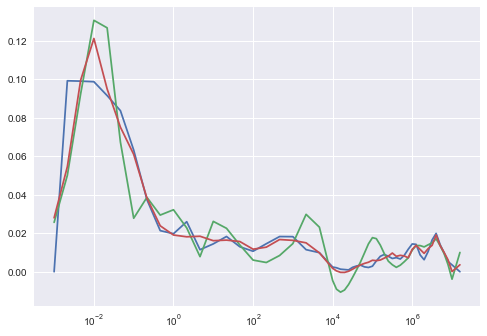

In [65]:
plt.plot(Ebins, y[22])
plt.plot(Ebins, avg_spectra[22])
plt.plot(Ebins, unfold(x[22], spectra_type[22]))
plt.xscale("log")

In [66]:
spectra_type[22]

array([0.38882593, 0.61117407, 0.        , 0.        ])

In [52]:
#["wFission, wGauss, wHigheenrgy, wEvap", "wSingleGaussian", "w" ]
spectra_type[0]

array([0.64959003, 0.07717462, 0.17742348, 0.09581186])

In [1368]:
i = 0

[0. 1. 0. 0.]


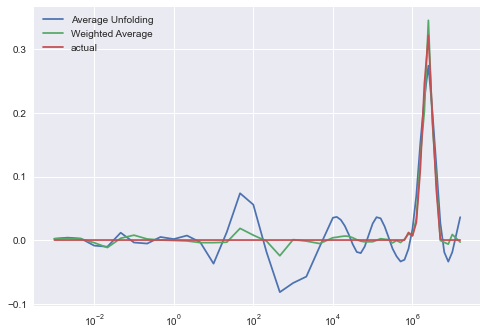

In [1374]:
plt.plot(Ebins, avg_spectra[i], label = "Average Unfolding")
print(spectra_type[i])
plt.xscale("log")
plt.plot(Ebins, unfold(x[i], spectra_type[i]), label = "Weighted Average")
plt.plot(Ebins, y[i], label = "actual")
plt.legend()
i += 1

Motivation for Activation Functions:

Arbitrary Testing:
Loss Tested with Sigmoid Hidden Layer Activation = 0.060130534596507995

Loss Tested with ReLu Hidden Layer Activation = 0.04257208179780142

In [783]:
def generate_model(layer1, layer2, layer3, drop, alpha):
    model = Sequential()
    
    hidden_activation = "relu"
    
    model.add(Dense(int(layer1), activation = LeakyReLU(alpha = alpha)))
    model.add(Dropout(drop))
    model.add(Dense(int(layer2), activation = LeakyReLU(alpha = alpha)))
    model.add(Dropout(drop))
    model.add(Dense(int(layer3), activation = LeakyReLU(alpha = alpha)))
    model.add(Dropout(drop))
    model.add(Dense(4, activation = "softmax"))
    
    return model

# Hyperparameter Optimization for Classification Network

In [793]:
def optimize_classification(layer1, layer2, layer3, drop, alpha, batch_size):
    
    N = 2000
    x,y = data_generation.FRUIT(N, [])
    avg_spectra, spectra_type = make_classification_data(x,y)
    x,y = avg_spectra, spectra_type
    
    MSEs = []
    
    SPLITS = 4
    boot = ShuffleSplit(n_splits = SPLITS, test_size = 0.2)
    for train, test in boot.split(x):
        
        tf.keras.backend.clear_session()
        
        xtrain, ytrain = x[train], y[train]
        xtest, ytest = x[test], y[test]
        
        model = generate_model(layer1, layer2, layer3, drop, alpha)
        model.compile(loss = "bce", optimizer = Adam(learning_rate=0.01))
        
        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-10,
                            patience=2, verbose=0, mode='min',
                            restore_best_weights=True)
    
        model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs=100000, batch_size = int(batch_size), verbose = 0, callbacks=[monitor])
    

    
        pred = model.predict(xtest)
        MSEs.append(metrics.mean_squared_error(ytest, pred))
        
    return -np.mean(MSEs)
        

In [795]:
pbounds = {"alpha" : (0, 0.1),
               "drop" : (0.1, 0.3),
               "layer1" : (100, 180),
               "layer2" : (160, 220),
               "layer3" : (180, 220),
               "batch_size" : (16, 360)}

optimizer = BayesianOptimization(f = optimize_classification, pbounds = pbounds, verbose = 2)
optimizer.maximize(init_points = 50, n_iter = 100)


|   iter    |  target   |   alpha   | batch_... |   drop    |  layer1   |  layer2   |  layer3   |
-------------------------------------------------------------------------------------------------
|  1        | -0.06664  |  0.03316  |  17.95    |  0.2431   |  144.3    |  188.3    |  188.3    |
|  2        | -0.05866  |  0.04687  |  203.5    |  0.2886   |  102.5    |  219.8    |  204.9    |
|  3        | -0.06074  |  0.09809  |  352.8    |  0.2325   |  140.5    |  172.3    |  210.3    |
|  4        | -0.06116  |  0.01213  |  242.5    |  0.1608   |  178.2    |  163.8    |  219.3    |
|  5        | -0.06641  |  0.01921  |  75.25    |  0.1532   |  131.5    |  207.9    |  197.8    |
|  6        | -0.06753  |  0.04713  |  250.8    |  0.2861   |  112.3    |  181.6    |  216.6    |
|  7        | -0.05907  |  0.005009 |  167.1    |  0.1301   |  146.8    |  172.8    |  215.3    |
|  8        | -0.0636   |  0.01036  |  300.0    |  0.2376   |  118.9    |  172.6    |  191.6    |
|  9        | -0.058

|  51       | -0.05606  |  0.000949 |  189.7    |  0.2212   |  154.4    |  163.0    |  183.7    |
|  52       | -0.05712  |  0.04413  |  135.1    |  0.1826   |  148.7    |  202.7    |  206.5    |
|  53       | -0.05886  |  0.0      |  134.5    |  0.1154   |  136.9    |  210.7    |  193.8    |
|  54       | -0.05182  |  0.03518  |  127.1    |  0.2235   |  173.8    |  176.3    |  213.5    |
|  55       | -0.05738  |  0.0      |  136.5    |  0.2986   |  174.0    |  169.7    |  220.0    |
|  56       | -0.05986  |  0.02073  |  118.4    |  0.1      |  167.6    |  170.6    |  217.3    |
|  57       | -0.06142  |  0.05042  |  132.5    |  0.1738   |  165.1    |  182.1    |  213.4    |
|  58       | -0.06826  |  0.0474   |  131.3    |  0.244    |  137.0    |  209.1    |  208.7    |
|  59       | -0.06607  |  0.000354 |  142.9    |  0.2341   |  136.6    |  210.1    |  208.3    |
|  60       | -0.06359  |  0.001812 |  113.3    |  0.1824   |  148.4    |  203.9    |  189.7    |
|  61       | -0.060

KeyboardInterrupt: 

In [ ]:
## optimize_classification(122.3, 180.6, 206.7, 0.2236, 0.04046, 150.3)

In [ ]:
" target   |   alpha   | batch_... |   drop    |  layer1   |  layer2   |  layer3"
"             0.05219  |  254.2    |  0.1707   |  153.7    |  193.1    |  197.7"
"-0.04374  |  0.04046  |  150.3    |  0.2236   |  122.3    |  180.6    |  206.7    |"
"-0.05066  |  0.004094 |  115.2    |  0.1352   |  164.7    |  191.5    |  197.6    |"

In [801]:
alpha, batch_size, drop, layer1, layer2, layer3 = 0.004094, 115.2, 0.1352, 164.7, 191.5, 197.6
model_classify = generate_model(layer1, layer2, layer3, drop, alpha)
model_classify.compile(loss = "bce", optimizer = Adam(learning_rate=0.005))

SPLITS = 1
boot = ShuffleSplit(n_splits = SPLITS, test_size = 0.2)

N = 20000
x,y = data_generation.FRUIT(N, [])
avg_spectra, spectra_type = make_classification_data(x,y)

x,y = avg_spectra, spectra_type
for train, test in boot.split(x):
    xtrain, ytrain = x[train], y[train]
    xtest, ytest = x[test], y[test]
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-10,
                            patience=20, verbose=0, mode='min',
                            restore_best_weights=True)
    
    model_classify.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs=100000, batch_size = int(batch_size), verbose = 0, callbacks=[monitor])
    
    pred = model_classify.predict(xtest)
    print(metrics.mean_squared_error(ytest, pred))


0.017628718563452918


In [808]:
N = 1000

In [809]:
x,y = data_generation.FRUIT(N, [])
avg_spectra, spectra_type = make_classification_data(x,y)
types = np.array(model_classify(avg_spectra))
print("On Fruit Data : ")
print("Classification Loss : ", np.mean( (spectra_type - types)**2 ))
print("Random Loss : ", np.mean( (spectra_type - np.random.random(types.shape))**2 ))

On Fruit Data : 
Classification Loss :  0.01803383710230183
Random Loss :  0.26275038364059344


In [810]:
x,y = loadXY()
avg_spectra, spectra_type = make_classification_data(x,y)
types = np.array(model_classify(avg_spectra))
print("On IAEA Data : ")
print("Classification Loss : ", np.mean( (spectra_type - types)**2 ))
print("Random Loss : ", np.mean( (spectra_type - np.random.random(types.shape))**2 ))

On IAEA Data : 
Classification Loss :  0.11526847078363761
Random Loss :  0.2574901973074016


In [1375]:
i = 0
x,y = loadXY()
types = np.array(model_classify(avg_spectra))

[0.6022428  0.00313866 0.11134619 0.28327233]


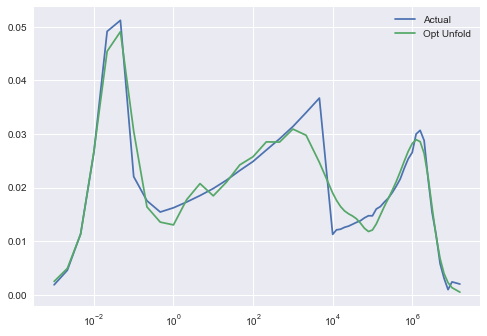

In [1381]:
i += 1
plt.plot(Ebins, y[i], label = "Actual")
plt.plot(Ebins, unfold(x[i], types[i]), label = "Opt Unfold")
print(types[i])
plt.legend()
plt.xscale("log")

In [1382]:
y_guess = []
for j in range(len(y)):
    y_guess.append(unfold(x[j], types[j]))
y_guess = np.array(y_guess)

print( "MSE : {:e}".format(np.mean( (y - y_guess )**2 ) ) )

MSE : 1.316871e-04


# Verifying that the optimization done to create training data works correctly

/var/folders/66/dcsv62x14w98n4s5n8mdhpvc0000gn/T/ipykernel_22506/2138105348.py:16: RuntimeWarning: invalid value encountered in true_divide
  params /= np.sum(params)


Fission :  2.85564906094159e-05
Gauss :  5.387894254373702e-05
High energy :  1.2902682707927818e-06
Evap :  3.353704789227292e-06
Optimized :  1.0232405054173887e-06 -- Best ? :  True
Fission : 0.10059545385790217 , Gauss : 0.0 , HE : 0.8145105593818208 , Evap : 0.08489398676027686


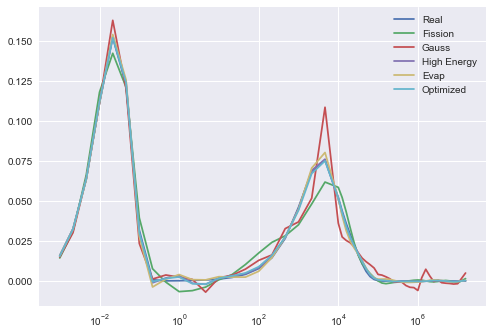

In [728]:
N = 2000
x,y = data_generation.FRUIT(N, [])
avg_spectra, spectra_type = make_classification_data(x,y)
spectra_type

i = 0

plt.plot(Ebins, y[i], label = "Real")

plt.plot(Ebins, np.matmul(x[i], wFission), label = "Fission")
fissionMSE = np.mean((np.matmul(x[i], wFission) - y[i])**2)
print( "Fission : ",  fissionMSE )

plt.plot(Ebins, np.matmul(x[i], wGauss), label = "Gauss")
gaussMSE = np.mean((np.matmul(x[i], wGauss) - y[i])**2)
print( "Gauss : ",  gaussMSE )

plt.plot(Ebins, np.matmul(x[i], wHighEnergy), label = "High Energy")
heMSE = np.mean((np.matmul(x[i], wHighEnergy) - y[i])**2)
print( "High energy : ",  heMSE )

plt.plot(Ebins, np.matmul(x[i], wEvap), label = "Evap")
evapMSE = np.mean((np.matmul(x[i], wEvap) - y[i])**2)
print( "Evap : ", evapMSE )

MSEs = [fissionMSE, gaussMSE, heMSE, evapMSE]

optMSE = np.mean((unfold(x[i], spectra_type[i]) - y[i])**2)
plt.plot(Ebins, unfold(x[i], spectra_type[i]), label = "Optimized")
print( "Optimized : ", optMSE, "-- Best ? : ", optMSE <= np.min(MSEs) )
print("Fission : {} , Gauss : {} , HE : {} , Evap : {}".format(*spectra_type[i]))



plt.xscale("log")
plt.legend()
i += 1

# Testing Inverse w/ Non-Linear Weighting Function
### ***Must use gradient descent due to non-linearity and lack of closed-form solution

In [1280]:
w0 = np.random.random((15,53))

In [1281]:
def S(sigma):
    output = np.zeros(sigma.shape)
    for i in range(sigma.shape[0]):
        for k in range(sigma.shape[1]):
            output[i][k] = sigma[i][k]**2 / np.sum([sigma[i][g]**2 for g in range(sigma.shape[1])])
    return output

def dSdw(sigma):
    S_calc = S(sigma)
    output = np.zeros((y.shape[0], y.shape[1], x.shape[1], y.shape[1]))
    return np.einsum("ij,jk,ik,ip->ikpj",2/sigma,delta,S_calc,x) - np.einsum("ij,ij,ik,ip->ikpj",2/sigma,S_calc,S_calc,x)

def gradient(w, x, y):
    
    sigma = np.matmul(x, w)
    S_calc = S(sigma)
    dSdw_calc = dSdw(sigma)
    
    return 2 * np.tensordot( (S_calc - y), dSdw_calc )

In [1284]:
w = np.copy(w0)
x,y = fission(400)

In [1285]:
for _ in range(2000):
    lr = 10
    momentum = 0.9
    dw = ( - lr * gradient(w, x, y) ) + (momentum * dw)
    w += dw
    print("Training Step {}".format(_))
    print("Loss : {:e}".format( np.mean( ( S(np.matmul(x, w)) - y )**2 ) ) )
    

Training Step 0
Loss : 1.975872e-03
Training Step 1
Loss : 1.511236e-03
Training Step 2
Loss : 1.212011e-03
Training Step 3
Loss : 1.116773e-03
Training Step 4
Loss : 1.089849e-03
Training Step 5
Loss : 1.066205e-03
Training Step 6
Loss : 1.035844e-03
Training Step 7
Loss : 1.002777e-03
Training Step 8
Loss : 9.714579e-04
Training Step 9
Loss : 9.442675e-04
Training Step 10
Loss : 9.218870e-04
Training Step 11
Loss : 9.040505e-04
Training Step 12
Loss : 8.900891e-04
Training Step 13
Loss : 8.792382e-04
Training Step 14
Loss : 8.707834e-04
Training Step 15
Loss : 8.641160e-04
Training Step 16
Loss : 8.587438e-04
Training Step 17
Loss : 8.542811e-04
Training Step 18
Loss : 8.504329e-04
Training Step 19
Loss : 8.469778e-04
Training Step 20
Loss : 8.437536e-04
Training Step 21
Loss : 8.406444e-04
Training Step 22
Loss : 8.375704e-04
Training Step 23
Loss : 8.344800e-04
Training Step 24
Loss : 8.313432e-04
Training Step 25
Loss : 8.281463e-04
Training Step 26
Loss : 8.248878e-04
Training St

Training Step 219
Loss : 5.676939e-04
Training Step 220
Loss : 5.670065e-04
Training Step 221
Loss : 5.663215e-04
Training Step 222
Loss : 5.656388e-04
Training Step 223
Loss : 5.649584e-04
Training Step 224
Loss : 5.642804e-04
Training Step 225
Loss : 5.636046e-04
Training Step 226
Loss : 5.629312e-04
Training Step 227
Loss : 5.622600e-04
Training Step 228
Loss : 5.615911e-04
Training Step 229
Loss : 5.609245e-04
Training Step 230
Loss : 5.602601e-04
Training Step 231
Loss : 5.595979e-04
Training Step 232
Loss : 5.589379e-04
Training Step 233
Loss : 5.582801e-04
Training Step 234
Loss : 5.576244e-04
Training Step 235
Loss : 5.569709e-04
Training Step 236
Loss : 5.563196e-04
Training Step 237
Loss : 5.556703e-04
Training Step 238
Loss : 5.550232e-04
Training Step 239
Loss : 5.543781e-04
Training Step 240
Loss : 5.537350e-04
Training Step 241
Loss : 5.530940e-04
Training Step 242
Loss : 5.524550e-04
Training Step 243
Loss : 5.518180e-04
Training Step 244
Loss : 5.511830e-04
Training Ste

Training Step 435
Loss : 4.572578e-04
Training Step 436
Loss : 4.569110e-04
Training Step 437
Loss : 4.565655e-04
Training Step 438
Loss : 4.562214e-04
Training Step 439
Loss : 4.558785e-04
Training Step 440
Loss : 4.555371e-04
Training Step 441
Loss : 4.551969e-04
Training Step 442
Loss : 4.548580e-04
Training Step 443
Loss : 4.545205e-04
Training Step 444
Loss : 4.541842e-04
Training Step 445
Loss : 4.538492e-04
Training Step 446
Loss : 4.535156e-04
Training Step 447
Loss : 4.531832e-04
Training Step 448
Loss : 4.528521e-04
Training Step 449
Loss : 4.525222e-04
Training Step 450
Loss : 4.521937e-04
Training Step 451
Loss : 4.518664e-04
Training Step 452
Loss : 4.515403e-04
Training Step 453
Loss : 4.512155e-04
Training Step 454
Loss : 4.508919e-04
Training Step 455
Loss : 4.505695e-04
Training Step 456
Loss : 4.502484e-04
Training Step 457
Loss : 4.499285e-04
Training Step 458
Loss : 4.496098e-04
Training Step 459
Loss : 4.492923e-04
Training Step 460
Loss : 4.489760e-04
Training Ste

Training Step 651
Loss : 4.021911e-04
Training Step 652
Loss : 4.019872e-04
Training Step 653
Loss : 4.017836e-04
Training Step 654
Loss : 4.015803e-04
Training Step 655
Loss : 4.013773e-04
Training Step 656
Loss : 4.011746e-04
Training Step 657
Loss : 4.009723e-04
Training Step 658
Loss : 4.007702e-04
Training Step 659
Loss : 4.005684e-04
Training Step 660
Loss : 4.003670e-04
Training Step 661
Loss : 4.001658e-04
Training Step 662
Loss : 3.999650e-04
Training Step 663
Loss : 3.997645e-04
Training Step 664
Loss : 3.995643e-04
Training Step 665
Loss : 3.993643e-04
Training Step 666
Loss : 3.991648e-04
Training Step 667
Loss : 3.989655e-04
Training Step 668
Loss : 3.987665e-04
Training Step 669
Loss : 3.985679e-04
Training Step 670
Loss : 3.983696e-04
Training Step 671
Loss : 3.981716e-04
Training Step 672
Loss : 3.979739e-04
Training Step 673
Loss : 3.977765e-04
Training Step 674
Loss : 3.975795e-04
Training Step 675
Loss : 3.973828e-04
Training Step 676
Loss : 3.971864e-04
Training Ste

Training Step 867
Loss : 3.662377e-04
Training Step 868
Loss : 3.661086e-04
Training Step 869
Loss : 3.659797e-04
Training Step 870
Loss : 3.658512e-04
Training Step 871
Loss : 3.657229e-04
Training Step 872
Loss : 3.655949e-04
Training Step 873
Loss : 3.654672e-04
Training Step 874
Loss : 3.653398e-04
Training Step 875
Loss : 3.652126e-04
Training Step 876
Loss : 3.650858e-04
Training Step 877
Loss : 3.649592e-04
Training Step 878
Loss : 3.648328e-04
Training Step 879
Loss : 3.647068e-04
Training Step 880
Loss : 3.645810e-04
Training Step 881
Loss : 3.644555e-04
Training Step 882
Loss : 3.643302e-04
Training Step 883
Loss : 3.642052e-04
Training Step 884
Loss : 3.640805e-04
Training Step 885
Loss : 3.639561e-04
Training Step 886
Loss : 3.638319e-04
Training Step 887
Loss : 3.637080e-04
Training Step 888
Loss : 3.635843e-04
Training Step 889
Loss : 3.634609e-04
Training Step 890
Loss : 3.633378e-04
Training Step 891
Loss : 3.632149e-04
Training Step 892
Loss : 3.630922e-04
Training Ste


KeyboardInterrupt



In [1250]:
np.max(w)

532.3753808280356

In [1286]:
x,y = fission(100)

In [1287]:
y_pred = S(np.matmul(x, w))

In [1288]:
i = 0

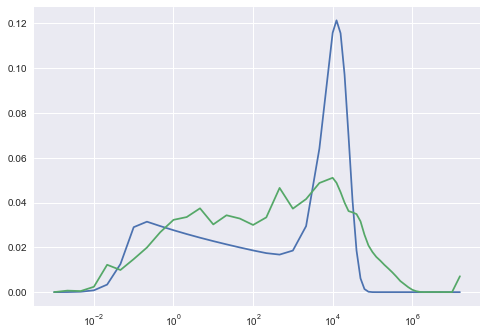

In [1293]:
plt.plot(Ebins, y[i])
plt.plot(Ebins, y_pred[i])
plt.xscale("log")
i += 1

In [ ]:
# Conclusion -- This activation function seems to suffer from the vanishing gradient problem.

# Testing Innate Linearity of Unfolding

In [1320]:
# Question which needs to be true for this argument to work:

# - Say you place a radiation source A in a room and measure the bonner sphere detector response A

# - Then, you place a radiation source B in the room and measure the bonner sphere detector response B

# - If you put both source A, with neutron emission rate sA and B with neutron emission rate bA next to eachother in the room, 
# do we measure the weighted sum of response A and B (weighted by the relative intensities)?

In [ ]:
# If this is true, then we desire linearity in our unfolding algorithm.

# - If we have non-linearity, say that we have a method which can perfectly unfold response A and response B.

# - If we pass it response weighted sum(A, B) it will not be able to unfold this due to the non-linearity of the outputs

# - A complex enough neural network will have memorized multiple unfolding mappings for each situation, however many
# of these will be redundant due to the nonlinearity. It is thus more efficient to use a linear unfolding.

In [1294]:
x,y = loadXY()

In [1304]:
# First, find two spectra which can both be unfolded fairly well by the same pseudo-inverse

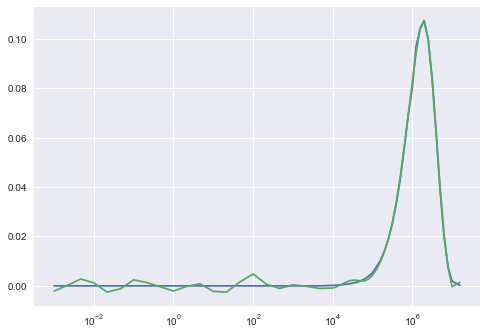

In [1315]:
i = 0

plt.plot(Ebins, y[i])
plt.plot(Ebins, np.matmul(x[i], wFission))

plt.xscale("log")

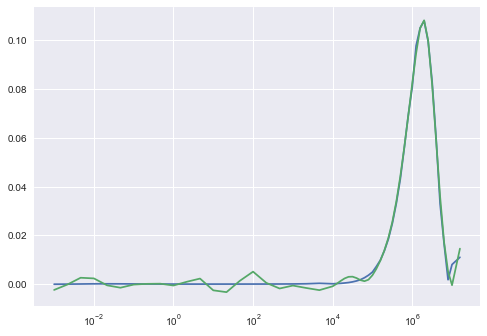

In [1316]:
j = 6

plt.plot(Ebins, y[j])
plt.plot(Ebins, np.matmul(x[j], wFission))

plt.xscale("log")

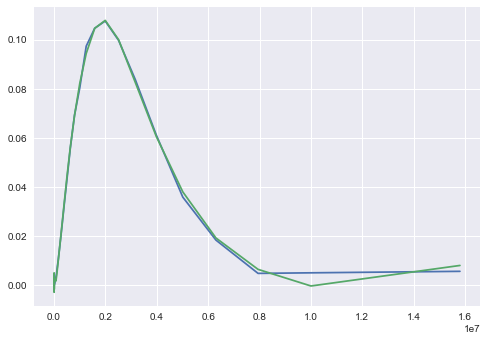

In [1319]:
plt.plot(Ebins, (y[j] + y[i]) / 2 )
plt.plot(Ebins, np.matmul( (x[i] + x[j]) / 2, wFission ) )

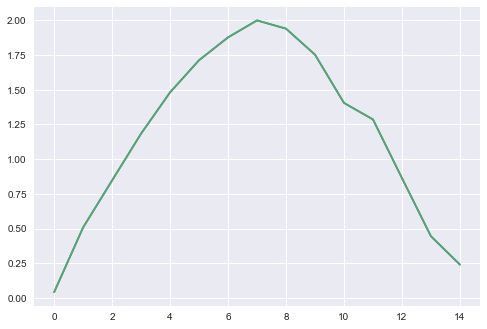

In [1302]:
plt.plot( (x[0] + x[1]) / 2 )
plt.plot( np.matmul(cm, (y[0] + y[1]) / 2 ) )

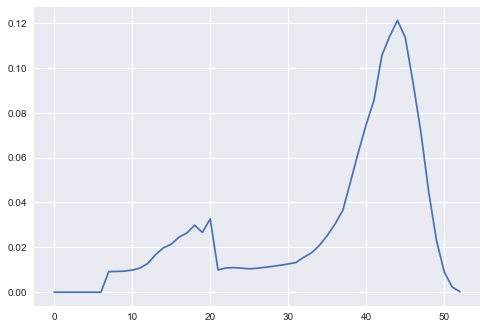

In [1303]:
plt.plot( y[0] + y[1] / 2)